# Comparing evaluation through detection and tracking metrics



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

import auxiliar as aux

In [2]:
path = '../outputs/evaluation/'
file_name = 'all_metrics.csv'

tb = pd.read_csv(path + file_name, sep=",")

In [3]:
result_m = aux.correlation_matrix(tb)
result_m2 = aux.correlation_matrix(tb, metrics='tracking')
result_m3 = aux.correlation_matrix(tb, metrics='detection')

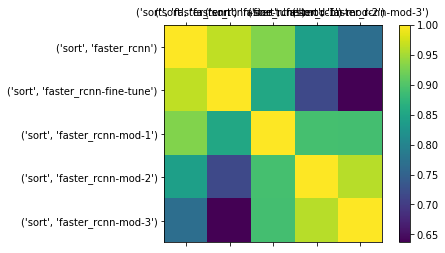

In [4]:
alpha = aux.combinations(tb)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(result_m, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [5]:
tb.dtypes

Tracker                     object
Detector                    object
Dataset name                object
Set id                      object
mAP                        float64
Precision                  float64
Recall                     float64
TP                           int64
FP                           int64
GT detections                int64
FN                           int64
HOTA(0)                    float64
LocA(0)                    float64
HOTALocA(0)                float64
HOTA___5                   float64
HOTA___10                  float64
HOTA___15                  float64
HOTA___20                  float64
HOTA___25                  float64
HOTA___30                  float64
HOTA___35                  float64
HOTA___40                  float64
HOTA___45                  float64
HOTA___50                  float64
HOTA___55                  float64
HOTA___60                  float64
HOTA___65                  float64
HOTA___70                  float64
HOTA___75           

In [6]:
metrics = ['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']

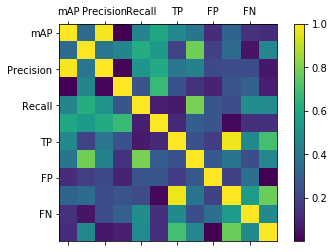

In [7]:
result_m = aux.correlation_metrics(tb, metrics)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(result_m, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+metrics)
ax.set_yticklabels(['']+metrics)

plt.show()

In [8]:
tb[['mAP']].values.flatten()

array([41.686243, 54.103815, 64.077723, 67.048168, 65.413921, 67.183533,
       64.736747, 59.510762, 71.994412, 74.405801, 80.907313, 79.539278,
       84.04728 , 76.004695, 23.69104 , 39.248966, 40.601194, 44.240166,
       51.725326, 42.072711, 51.506577, 34.116557, 46.556512, 60.860086,
       64.642429, 60.50443 , 64.768035, 58.241007, 19.327699, 30.042432,
       50.464724, 57.719206, 43.512026, 57.056801, 40.771876])

In [9]:
m = aux.search(tb, 'sort', 'faster_rcnn')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
0,41.686243,37.103031,51.439169,13868,23509,13092,0.310986,-0.226952,0.754278,0.238481,482,0.018570
1,54.103815,56.480588,61.207484,40400,31129,25605,0.519879,0.076792,0.793972,0.425914,351,0.043214
2,64.077723,24.408495,72.775342,5643,17476,2111,0.468969,-0.261963,0.745297,0.371435,303,0.062577
3,67.048168,31.096708,72.306902,4222,9355,1617,0.473520,0.056150,0.804811,0.393205,96,0.038059
4,65.413921,27.925553,74.389045,10593,27340,3647,0.309919,-0.151180,0.733402,0.211041,714,0.012892
5,67.183533,23.260798,74.122715,7055,23275,2463,0.480671,-0.357143,0.816446,0.356835,158,0.035124
6,64.736747,28.949464,76.354798,12723,31226,3940,0.320055,-1.046641,0.729137,0.221308,538,0.030688


In [10]:
m = aux.search(tb, 'sort', 'faster_rcnn-fine-tune')
m[['mAP', 'Precision', 'Recall', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'IDSW', 'ATA']]

,mAP,Precision,Recall,TP,FP,FN,HOTA(0),MOTA,MOTP,IDF1,IDSW,ATA
7,59.510762,33.888257,71.880564,19379,37806,7581,0.296513,-0.540983,0.748434,0.199557,1039,0.013484
8,71.994412,77.600880,72.664192,47962,13844,18043,0.545801,0.419581,0.815255,0.485745,511,0.054685
9,74.405801,18.562839,81.622388,6329,27766,1425,0.383164,-0.832731,0.768324,0.282728,445,0.042379
10,80.907313,22.173971,84.826169,4953,17384,886,0.370085,-0.888075,0.805904,0.275234,190,0.017640
11,79.539278,27.399269,87.914326,12519,33172,1721,0.271681,-0.525275,0.748866,0.164540,1066,0.010984
12,84.047280,16.403265,89.745745,8542,43533,976,0.372019,-1.292285,0.821594,0.266914,404,0.020035
13,76.004695,34.137328,83.154294,13856,26733,2807,0.340435,-0.760350,0.742038,0.240626,695,0.039589


In [11]:
m1 = aux.search(tb, 'sort', 'faster_rcnn')
m2 = aux.search(tb, 'sort', 'faster_rcnn-fine-tune')

m1 = aux.all_metrics(m1).values
m2 = aux.all_metrics(m2).values

np.corrcoef(m1, m2)

array([[1.        , 0.96951063, 0.96242685, 0.95456423, 0.97282637,
        0.94168664, 0.92589337, 0.95892043, 0.88314545, 0.89769074,
        0.88806307, 0.93356887, 0.84863969, 0.93622411],
       [0.96951063, 1.        , 0.9295978 , 0.96827531, 0.94991082,
        0.91774499, 0.86308599, 0.92616295, 0.96556738, 0.84280727,
        0.8480328 , 0.90053038, 0.79227244, 0.89432681],
       [0.96242685, 0.9295978 , 1.        , 0.97790445, 0.99383192,
        0.99042238, 0.96145827, 0.98267048, 0.82740337, 0.97286235,
        0.95775466, 0.9832739 , 0.93556779, 0.97178865],
       [0.95456423, 0.96827531, 0.97790445, 1.        , 0.98360009,
        0.97570838, 0.90927116, 0.95833077, 0.9137797 , 0.92673918,
        0.92246574, 0.9567637 , 0.88549693, 0.93618619],
       [0.97282637, 0.94991082, 0.99383192, 0.98360009, 1.        ,
        0.97855467, 0.94155062, 0.97650933, 0.86281359, 0.94893177,
        0.93391429, 0.97366738, 0.90314191, 0.95749498],
       [0.94168664, 0.91774499, 0.9